In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import seaborn as sns

In [8]:
from partition_search_analysis_functions import all_partitions

In [3]:
root = Path('/home/users/jmumford/jaemon/maps')

best_partition_map = root / 'searchlight_q_means_best_partition.nii.gz'

In [5]:
# Load the NIfTI file
img = nib.load(best_partition_map)
data = img.get_fdata().astype(int)

# Flatten the data
data_flat = data.flatten()

# Optional: ignore background 0
data_flat = data_flat[data_flat > 0]


In [82]:
# get the partition dictionary (I should have saved this out when I ran the analysis)
from collections import defaultdict

data_dir = Path(
    '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/output_surveyMedley_noderivs_rerun/questionnaire_averages'
)

fmri_prep_dir = '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep'


# Get all .nii.gz files in the directory
all_files = list(data_dir.glob('*_questionnaire_avg_sub_*.nii.gz'))

# Group files by subject
subject_files = defaultdict(list)
for file in all_files:
    subject = file.name.split('sub_')[-1].split('.')[0]
    questionnaire = file.name.split('_questionnaire_')[0]
    subject_files[subject].append((questionnaire, file))

# Keep only subjects with all 5 questionnaires
complete_subjects = {
    subject: files for subject, files in subject_files.items() if len(files) == 5
}
questionnaires = sorted(
    set(q for files in complete_subjects.values() for q, _ in files)
)
questionnaire_dict = {name: i + 1 for i, name in enumerate(questionnaires)}

In [83]:
questionnaire_dict

{'brief': 1, 'future_time': 2, 'grit': 3, 'impulsive_venture': 4, 'upps': 5}

In [10]:
n_items = 5  # Number of questionnaires
partitions = all_partitions(n_items)
partition_key = {i + 1: p for i, p in enumerate(partitions)}

In [11]:
partition_key

{1: [[1], [2, 3, 4, 5]],
 2: [[1, 2], [3, 4, 5]],
 3: [[2], [1, 3, 4, 5]],
 4: [[1], [2], [3, 4, 5]],
 5: [[1, 2, 3], [4, 5]],
 6: [[2, 3], [1, 4, 5]],
 7: [[1], [2, 3], [4, 5]],
 8: [[1, 3], [2, 4, 5]],
 9: [[3], [1, 2, 4, 5]],
 10: [[1], [3], [2, 4, 5]],
 11: [[1, 2], [3], [4, 5]],
 12: [[2], [1, 3], [4, 5]],
 13: [[2], [3], [1, 4, 5]],
 14: [[1], [2], [3], [4, 5]],
 15: [[1, 2, 3, 4], [5]],
 16: [[2, 3, 4], [1, 5]],
 17: [[1], [2, 3, 4], [5]],
 18: [[1, 3, 4], [2, 5]],
 19: [[3, 4], [1, 2, 5]],
 20: [[1], [3, 4], [2, 5]],
 21: [[1, 2], [3, 4], [5]],
 22: [[2], [1, 3, 4], [5]],
 23: [[2], [3, 4], [1, 5]],
 24: [[1], [2], [3, 4], [5]],
 25: [[1, 2, 4], [3, 5]],
 26: [[2, 4], [1, 3, 5]],
 27: [[1], [2, 4], [3, 5]],
 28: [[1, 4], [2, 3, 5]],
 29: [[4], [1, 2, 3, 5]],
 30: [[1], [4], [2, 3, 5]],
 31: [[1, 2], [4], [3, 5]],
 32: [[2], [1, 4], [3, 5]],
 33: [[2], [4], [1, 3, 5]],
 34: [[1], [2], [4], [3, 5]],
 35: [[1, 2, 3], [4], [5]],
 36: [[2, 3], [1, 4], [5]],
 37: [[2, 3], [4], [1, 5]

In [84]:
int_to_name = {v: k for k, v in questionnaire_dict.items()}

# Build partition_key_names
partition_key_names = {
    part_num: [[int_to_name[i] for i in group] for group in groups]
    for part_num, groups in partition_key.items()
}

print(partition_key_names)

{1: [['brief'], ['future_time', 'grit', 'impulsive_venture', 'upps']], 2: [['brief', 'future_time'], ['grit', 'impulsive_venture', 'upps']], 3: [['future_time'], ['brief', 'grit', 'impulsive_venture', 'upps']], 4: [['brief'], ['future_time'], ['grit', 'impulsive_venture', 'upps']], 5: [['brief', 'future_time', 'grit'], ['impulsive_venture', 'upps']], 6: [['future_time', 'grit'], ['brief', 'impulsive_venture', 'upps']], 7: [['brief'], ['future_time', 'grit'], ['impulsive_venture', 'upps']], 8: [['brief', 'grit'], ['future_time', 'impulsive_venture', 'upps']], 9: [['grit'], ['brief', 'future_time', 'impulsive_venture', 'upps']], 10: [['brief'], ['grit'], ['future_time', 'impulsive_venture', 'upps']], 11: [['brief', 'future_time'], ['grit'], ['impulsive_venture', 'upps']], 12: [['future_time'], ['brief', 'grit'], ['impulsive_venture', 'upps']], 13: [['future_time'], ['grit'], ['brief', 'impulsive_venture', 'upps']], 14: [['brief'], ['future_time'], ['grit'], ['impulsive_venture', 'upps']]

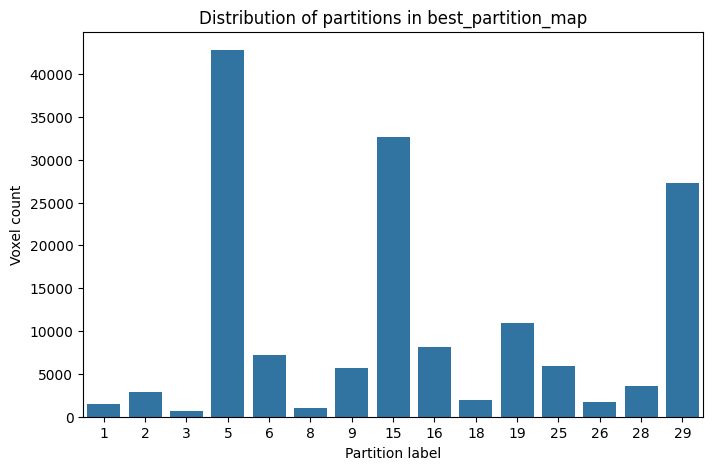

In [7]:
# Create the barplot
plt.figure(figsize=(8, 5))
sns.countplot(x=data_flat)
plt.xlabel('Partition label')
plt.ylabel('Voxel count')
plt.title('Distribution of partitions in best_partition_map')
plt.show()

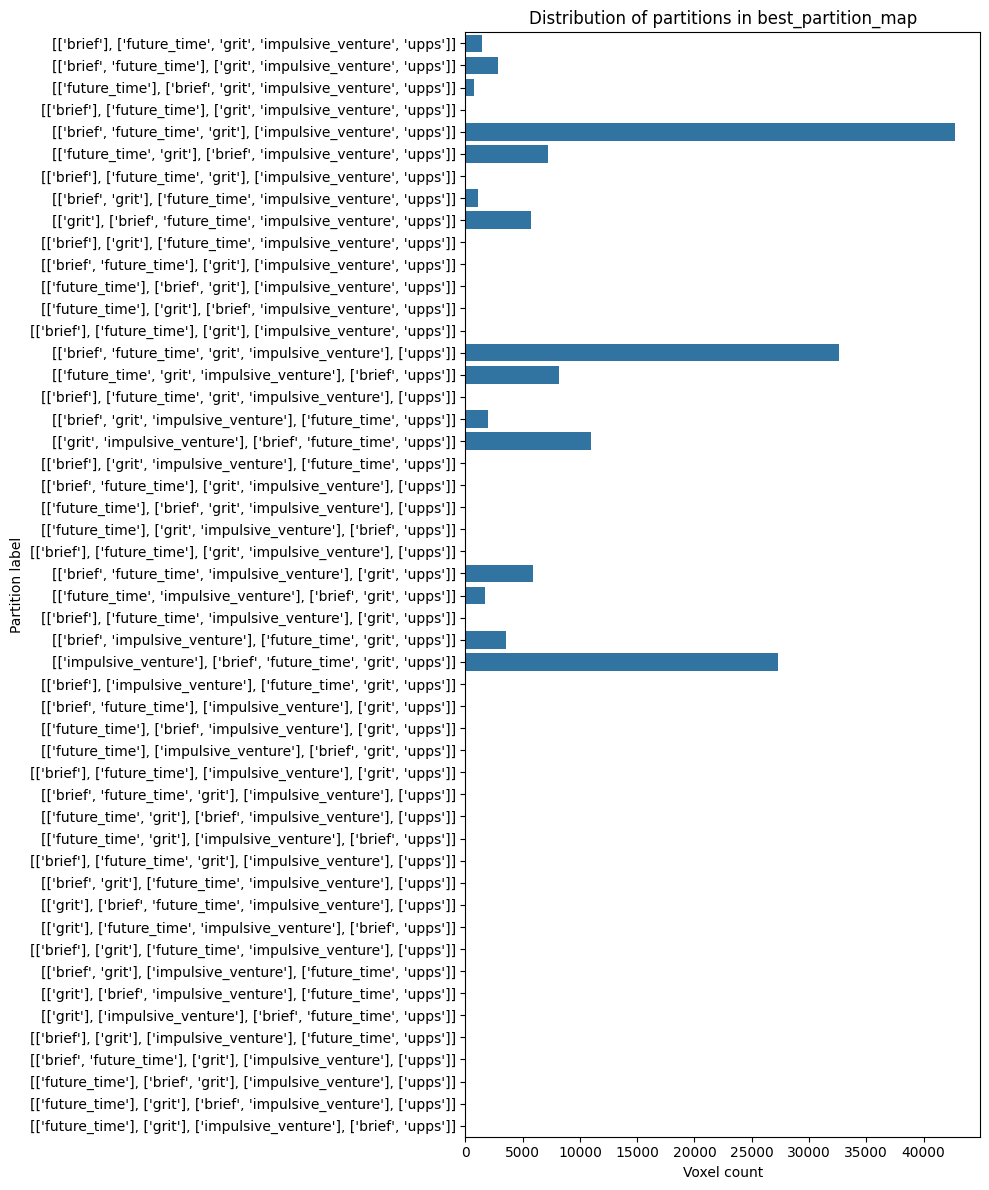

In [85]:
label_map = {k: str(v) for k, v in partition_key_names.items()}

# Convert numeric labels to string labels
data_labels = [label_map[val] for val in data_flat if val in label_map]

# Sort bars by numeric partition key
order = [label_map[k] for k in sorted(label_map.keys())]

# Plot horizontal barplot
plt.figure(figsize=(10, 12))
sns.countplot(y=data_labels, order=order)
plt.xlabel('Voxel count')
plt.ylabel('Partition label')
plt.title('Distribution of partitions in best_partition_map')
plt.tight_layout()
plt.show()

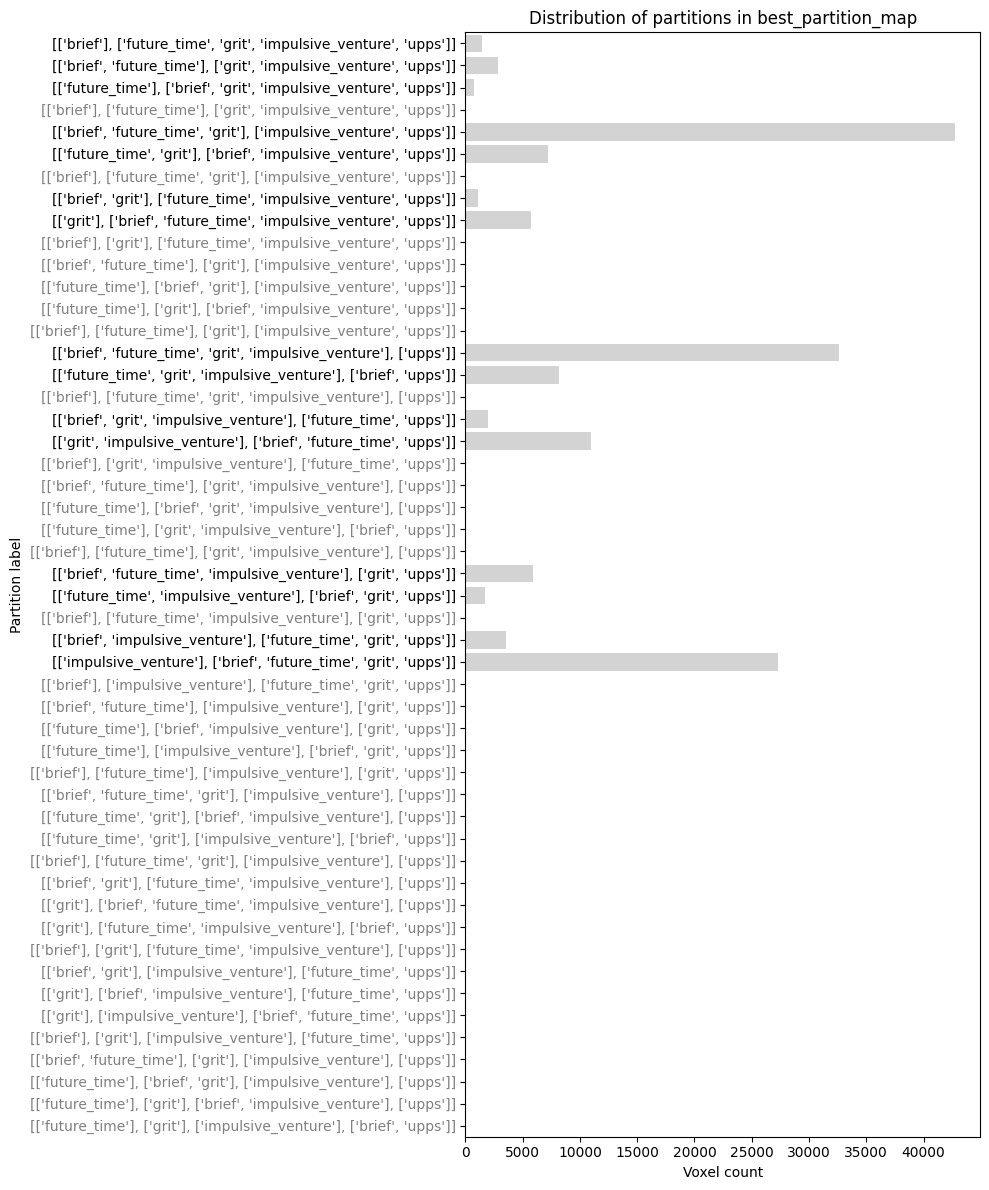

In [86]:
plt.figure(figsize=(10, 12))
sns.countplot(y=data_labels, order=order, color='lightgray')
plt.xlabel('Voxel count')
plt.ylabel('Partition label')
plt.title('Distribution of partitions in best_partition_map')

# Color y-tick labels: black for bi-partitions, gray for others
ax = plt.gca()
for label in ax.get_yticklabels():
    text = label.get_text()
    if text.count('[') == 3:  # bi-partition
        label.set_color('black')
    else:
        label.set_color('gray')

plt.tight_layout()
plt.show()

In [22]:
# This will need to be updated, but overlap with the F-test map

z_map = Path(
    '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/output_surveyMedley_noderivs_rerun/questionnaire_avgs_f_test_output/questionnaire_averages_f_test_z_score.nii.gz'
)

In [58]:
from nilearn.reporting import get_clusters_table

tables, map = get_clusters_table(
    z_img, 2.5, cluster_threshold=100, return_label_maps=True
)

cluster_map = map[0]

In [55]:
tables

Cluster ID          X           Y          Z  Peak Stat Cluster Size (mm3)
0           1  -6.299998  -90.699999  -3.699998  12.619993             269255
1          1a  11.300002  -84.099999   0.700002  11.793199                   
2          1b -17.299998 -101.699999   0.700002  11.199080                   
3          1c  22.300003  -99.499999   2.900002  10.176276                   
4           2 -34.899999   34.700004 -10.299999   9.694594             138232
5          2a -45.899999   32.500004  11.700002   9.100778                   
6          2b -43.699999   12.700003  27.100002   8.780301                   
7          2c -17.299998   39.100004  51.300003   8.770202                   
8           3  46.500003   10.500003  31.500002   7.706474              55337
9          3a  31.100003   25.900003  -3.699998   6.813221                   
10         3b  44.300003   28.100003  18.300002   6.479271                   
11         3c  31.100003   28.100003   2.900002   5.961824                   
12          4   2.500002  -31.299998  -3.699998   6.598812               4152
13         4a  -6.299998  -29.099998 -14.699999   4.547248                   
14         4b   6.900002  -31.299998 -14.699999   4.489882                   
15         4c  -8.499998  -20.299998 -12.499999   4.400871                   
16          5 -39.299999  -26.899998  53.500003   5.256565               3599
17         5a -41.499999  -24.699998  64.500003   4.688747                   
18         5b -30.499999  -29.099998  55.700003   4.135916                   
19          6 -43.699999   -4.899997 -14.699999   5.226583               3119
20         6a -39.299999  -13.699997  -1.499998   4.875712                   
21         6b -41.499999   -9.299997 -10.299999   4.793646                   
22         6c -34.899999  -13.699997   9.500002   3.564390                   
23          7  39.900003  -18.099998  16.100002   5.061346               4408
24         7a  33.300003  -26.899998  20.500002   4.616443                   
25         7b  61.900003  -31.299998  13.900002   4.548956                   
26         7c  57.500003  -20.299998  24.900002   4.049426                   
27          8 -21.699998  -40.099998 -47.699999   5.039917               2512
28         8a -17.299998  -53.299998 -47.699999   4.856109                   
29         8b -12.899998  -55.499998 -56.500000   4.045967                   
30          9  24.500003  -46.699998   9.500002   4.766045               1128
31         9a  31.100003  -51.099998   5.100002   3.954804                   
32         9b  22.300003  -33.499998  27.100002   3.603423                   
33         9c  20.100003  -40.099998  18.300002   3.571983                   
34         10 -52.499999  -33.499998   5.100002   4.688577               2331
35        10a -61.299999  -37.899998  13.900002   4.490373                   
36        10b -50.299999  -33.499998  22.700002   3.492477                   
37        10c -65.699999  -29.099998  20.500002   3.138217                   
38         11 -19.499998    3.900003   5.100002   4.410706               2204
39        11a -12.899998   10.500003  16.100002   4.339327                   
40        11b -15.099998    6.100003   7.300002   4.200953                   
41        11c -10.699998    1.700003  13.900002   4.023618                   
42         12  15.700002  -46.699998 -45.499999   4.311870               1394
43        12a   0.300002  -57.699998 -41.099999   4.210171                   
44        12b  11.300002  -53.299998 -49.899999   3.084458                   
45         13 -52.499999   -9.299997   5.100002   3.909442               1980
46        13a -63.499999  -15.899997   7.300002   3.525978                   
47        13b -65.699999   -0.499997   9.500002   3.519403                   
48        13c -61.299999   -9.299997  29.300002   3.505577

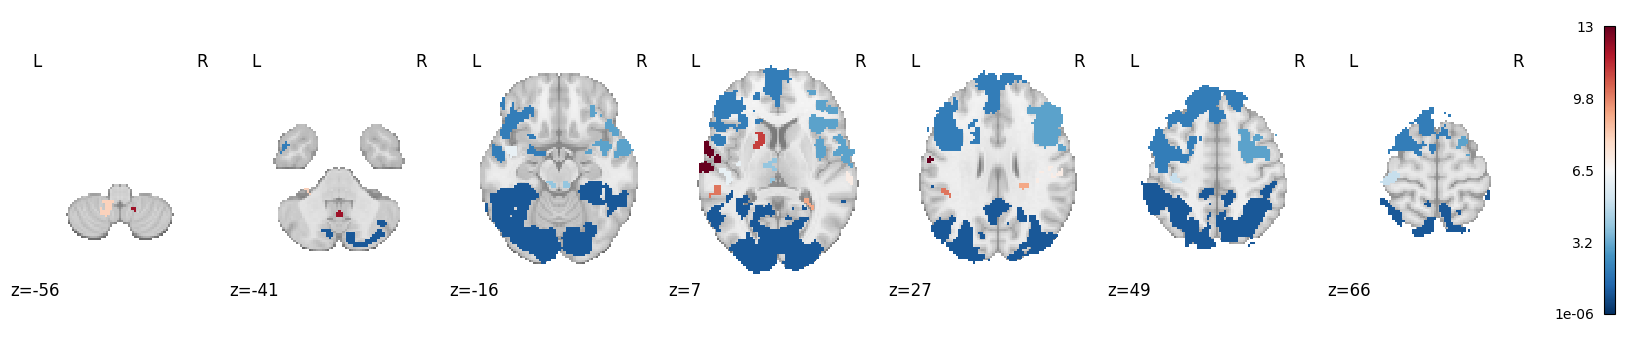

In [59]:
plotting.plot_stat_map(cluster_map, display_mode='z')

In [69]:
partition_img = nib.load(best_partition_map)
partition_data = partition_img.get_fdata()

# Step 1: threshold z-map at uncorrected z > 2
partition_sig_voxels = image.math_img(
    '(img > 0) * img2', img=cluster_map, img2=partition_img
)


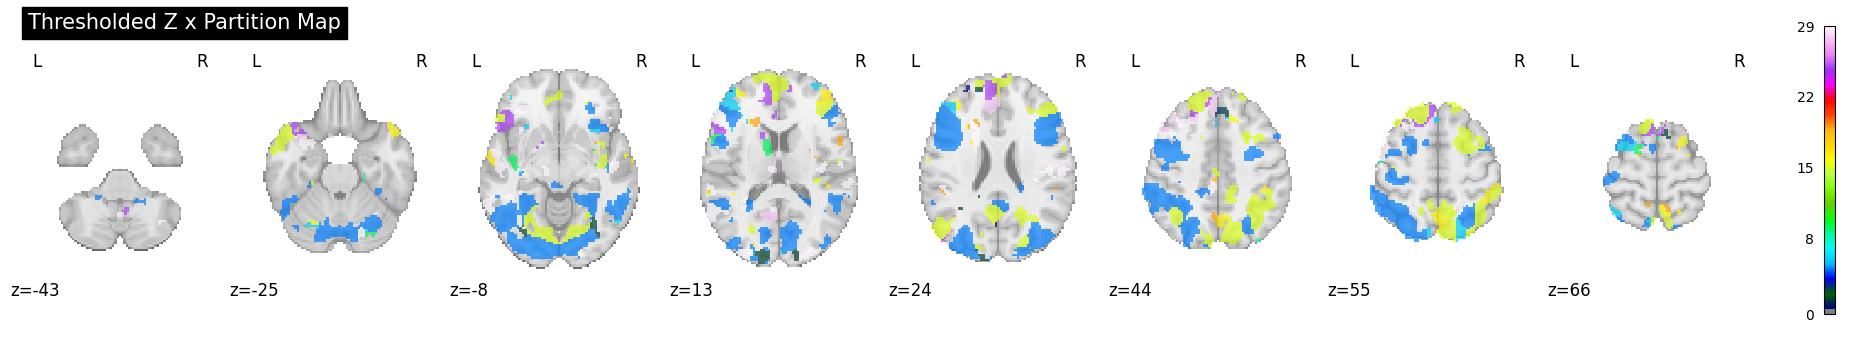

In [70]:
display = plotting.plot_roi(
    partition_sig_voxels,
    display_mode='z',
    cut_coords=8,  # pick 15 slices automatically
    colorbar=True,
    title='Thresholded Z x Partition Map',
)
plotting.show()

In [74]:
partition_sig_voxels_data = partition_sig_voxels.get_fdata()
np.unique(partition_sig_voxels_data)

array([ 0.,  1.,  2.,  3.,  5.,  6.,  8.,  9., 15., 16., 18., 19., 25.,
       26., 28., 29.])

In [88]:
partition_key_names

{1: [['brief'], ['future_time', 'grit', 'impulsive_venture', 'upps']],
 2: [['brief', 'future_time'], ['grit', 'impulsive_venture', 'upps']],
 3: [['future_time'], ['brief', 'grit', 'impulsive_venture', 'upps']],
 4: [['brief'], ['future_time'], ['grit', 'impulsive_venture', 'upps']],
 5: [['brief', 'future_time', 'grit'], ['impulsive_venture', 'upps']],
 6: [['future_time', 'grit'], ['brief', 'impulsive_venture', 'upps']],
 7: [['brief'], ['future_time', 'grit'], ['impulsive_venture', 'upps']],
 8: [['brief', 'grit'], ['future_time', 'impulsive_venture', 'upps']],
 9: [['grit'], ['brief', 'future_time', 'impulsive_venture', 'upps']],
 10: [['brief'], ['grit'], ['future_time', 'impulsive_venture', 'upps']],
 11: [['brief', 'future_time'], ['grit'], ['impulsive_venture', 'upps']],
 12: [['future_time'], ['brief', 'grit'], ['impulsive_venture', 'upps']],
 13: [['future_time'], ['grit'], ['brief', 'impulsive_venture', 'upps']],
 14: [['brief'], ['future_time'], ['grit'], ['impulsive_ventu

/tmp/ipykernel_18344/2510148441.py:16: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  mask_img = image.new_img_like(partition_sig_voxels, mask_data)
/home/users/jmumford/jaemon/.venv/lib/python3.9/site-packages/numpy/ma/core.py:2846: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


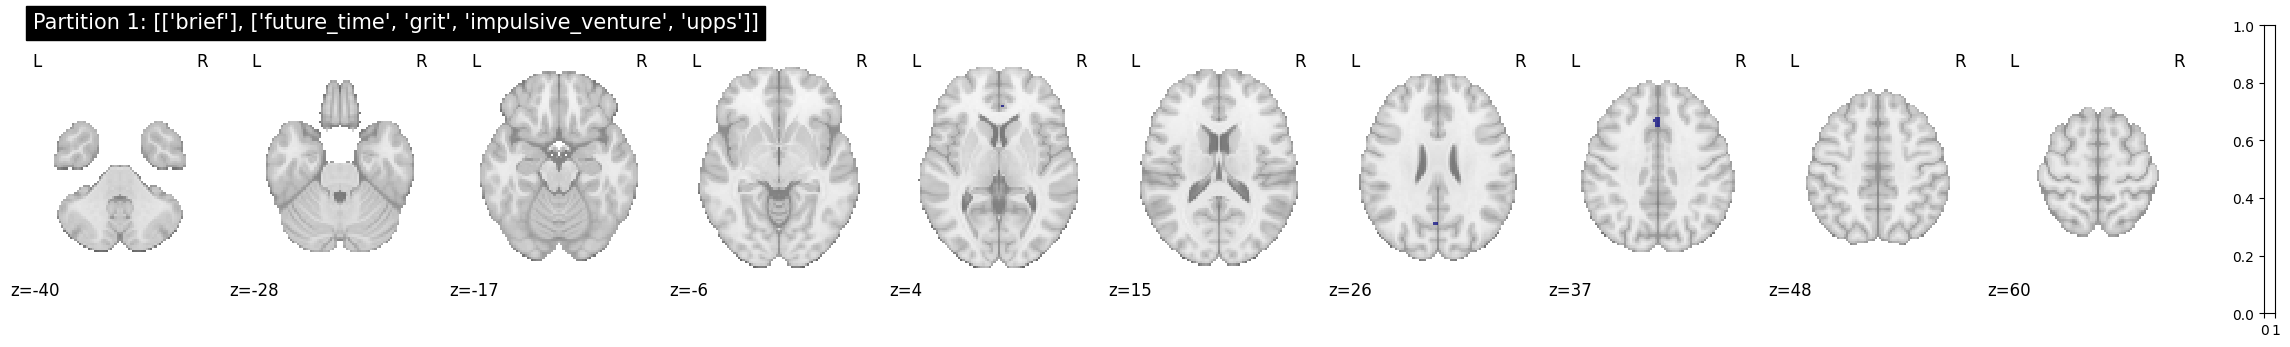

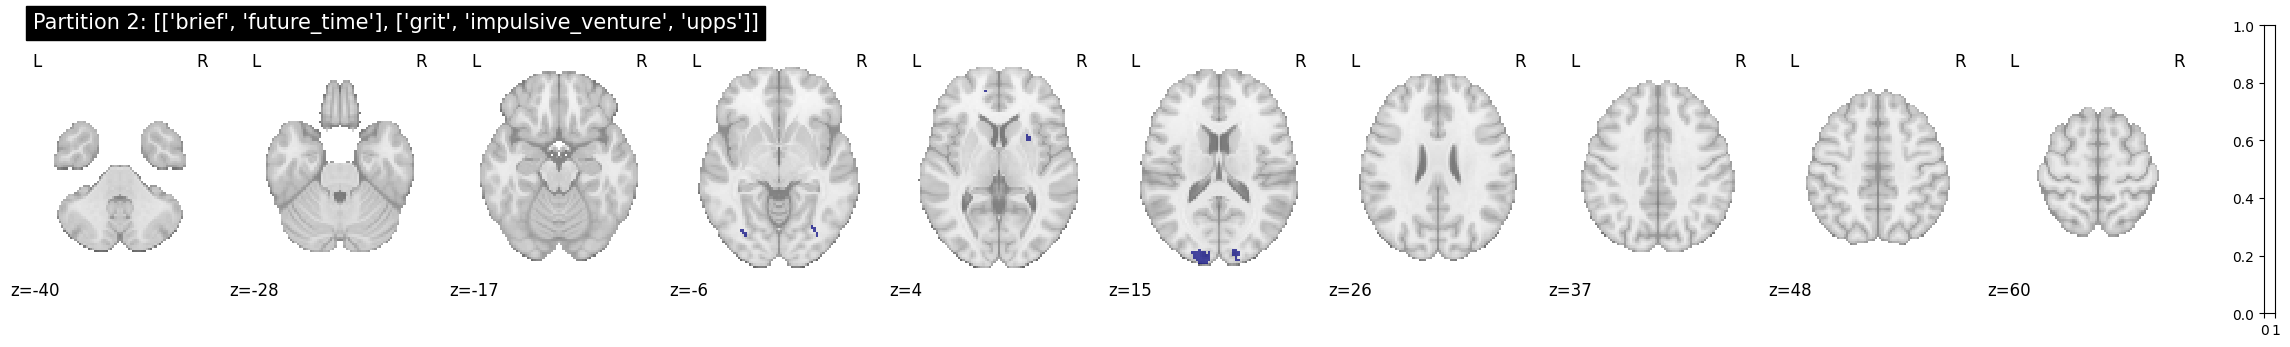

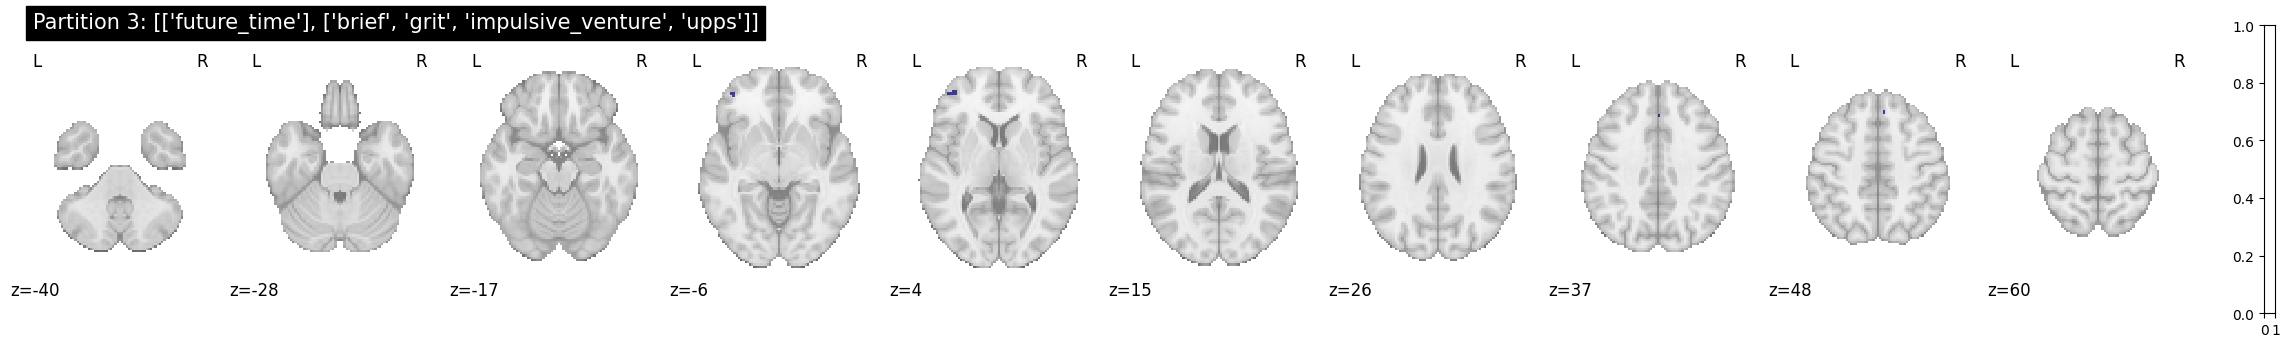

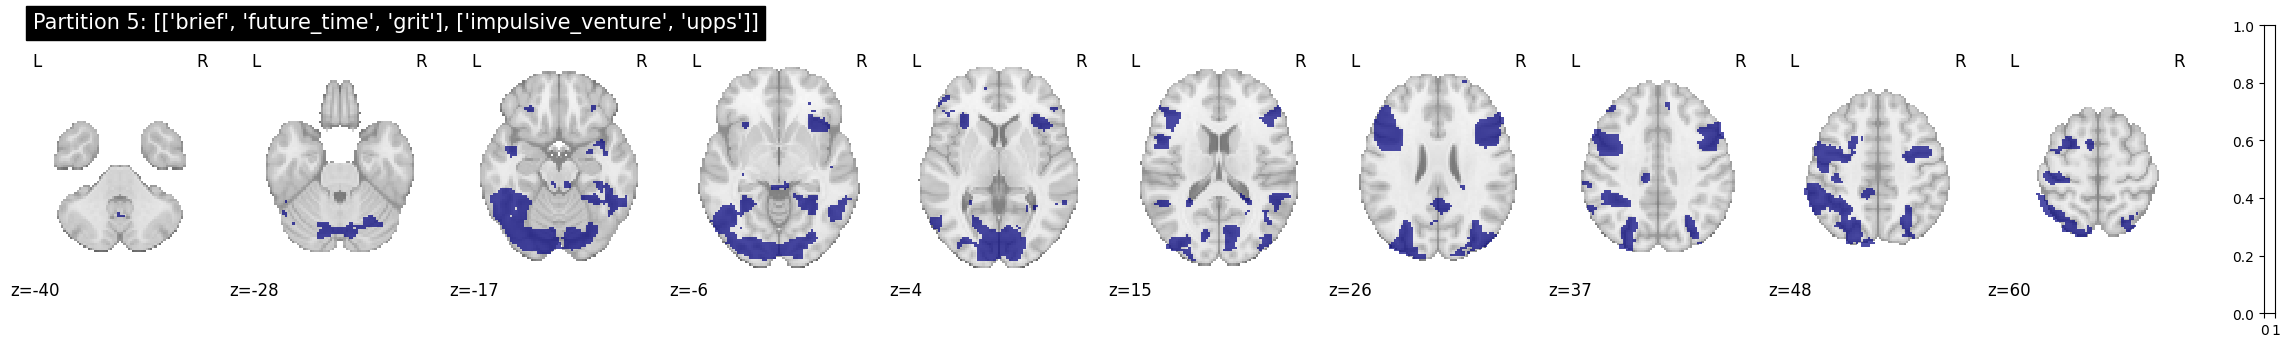

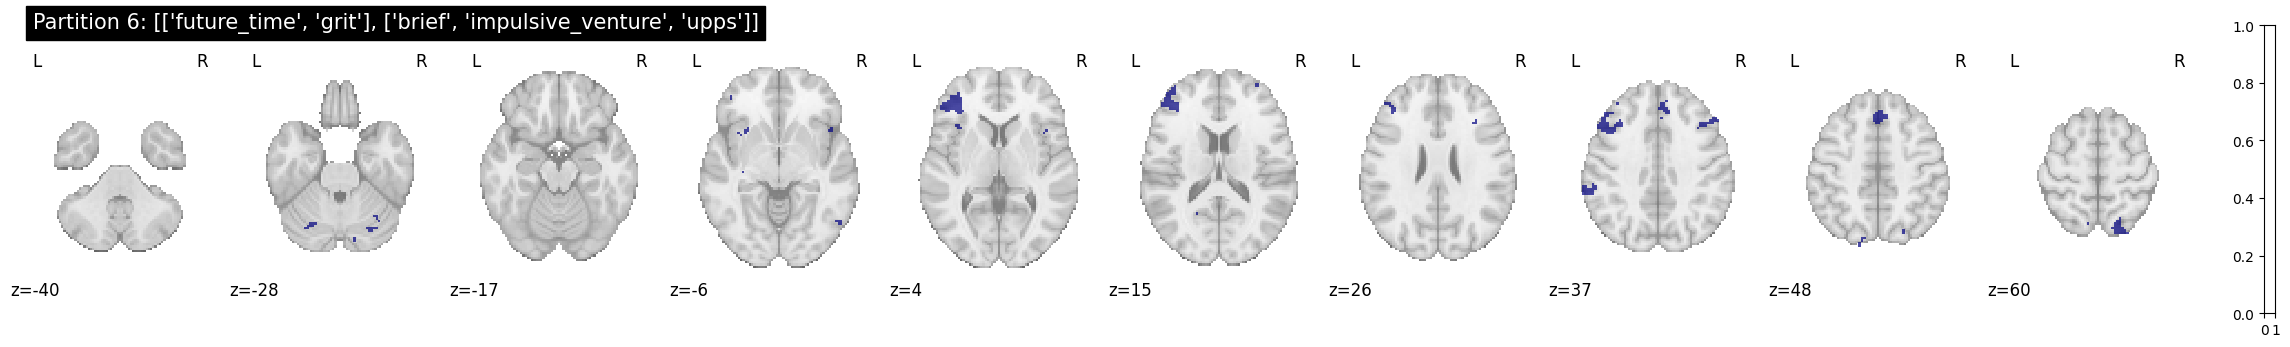

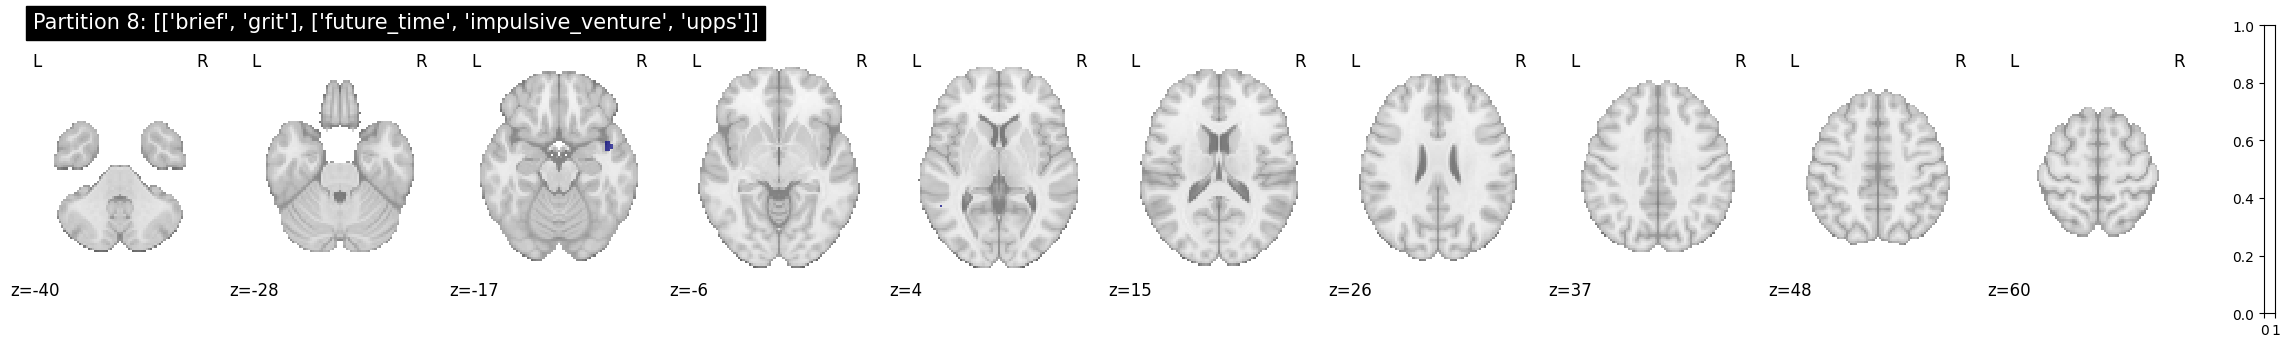

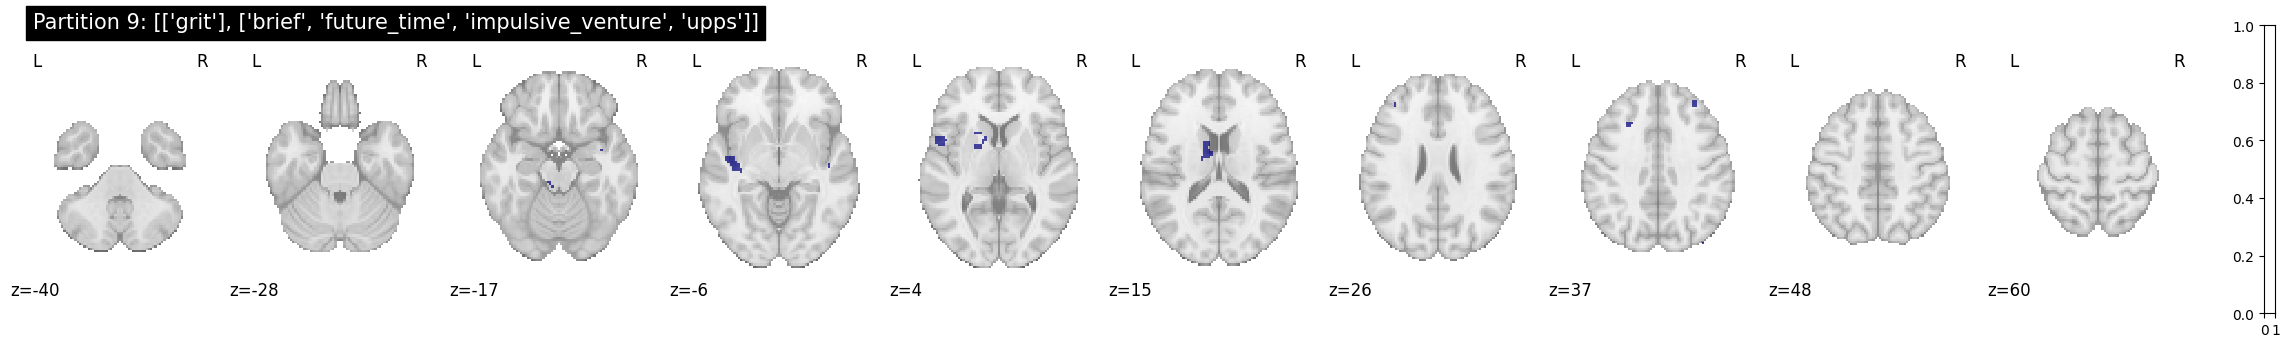

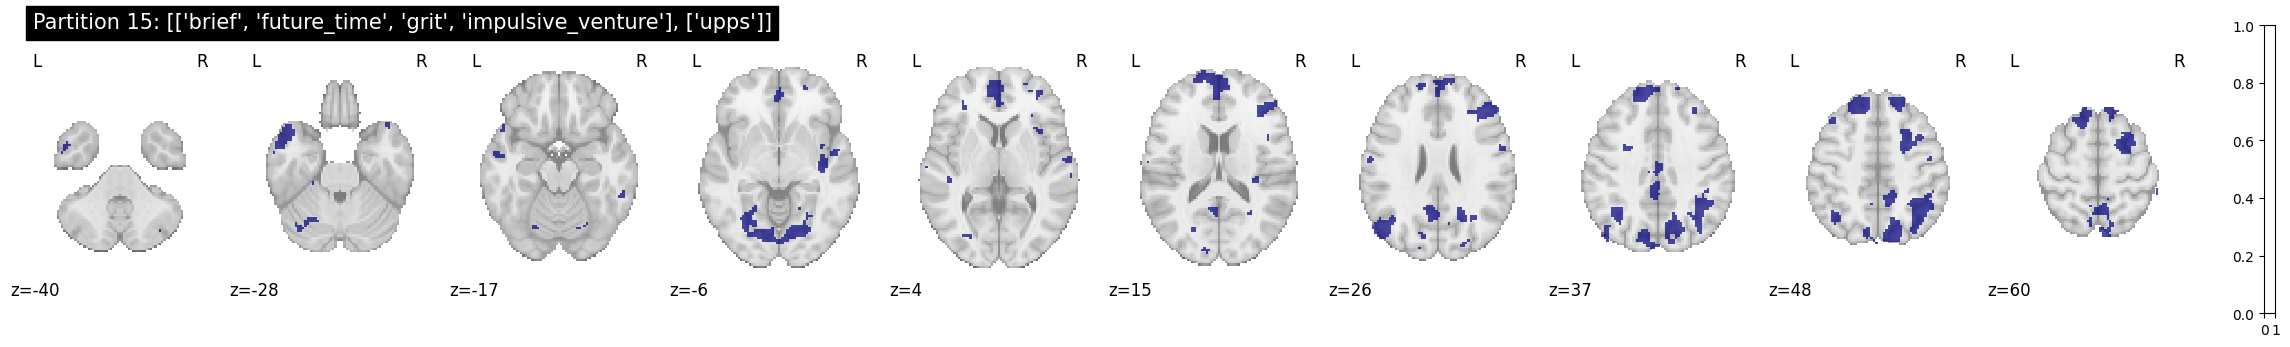

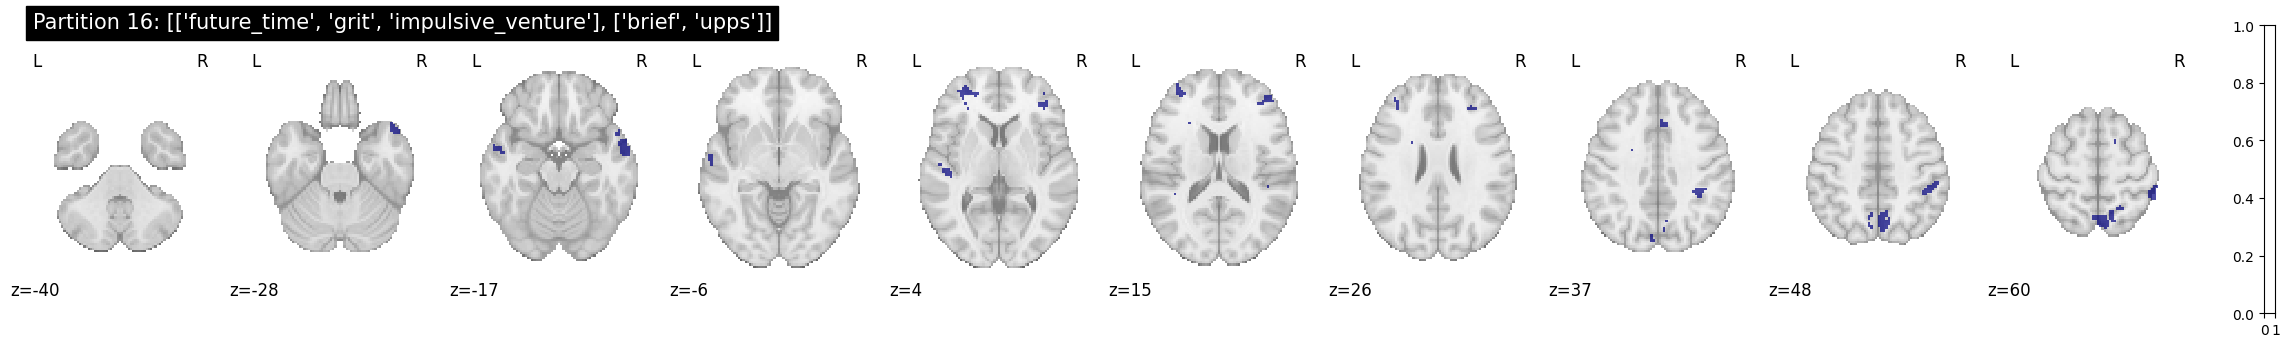

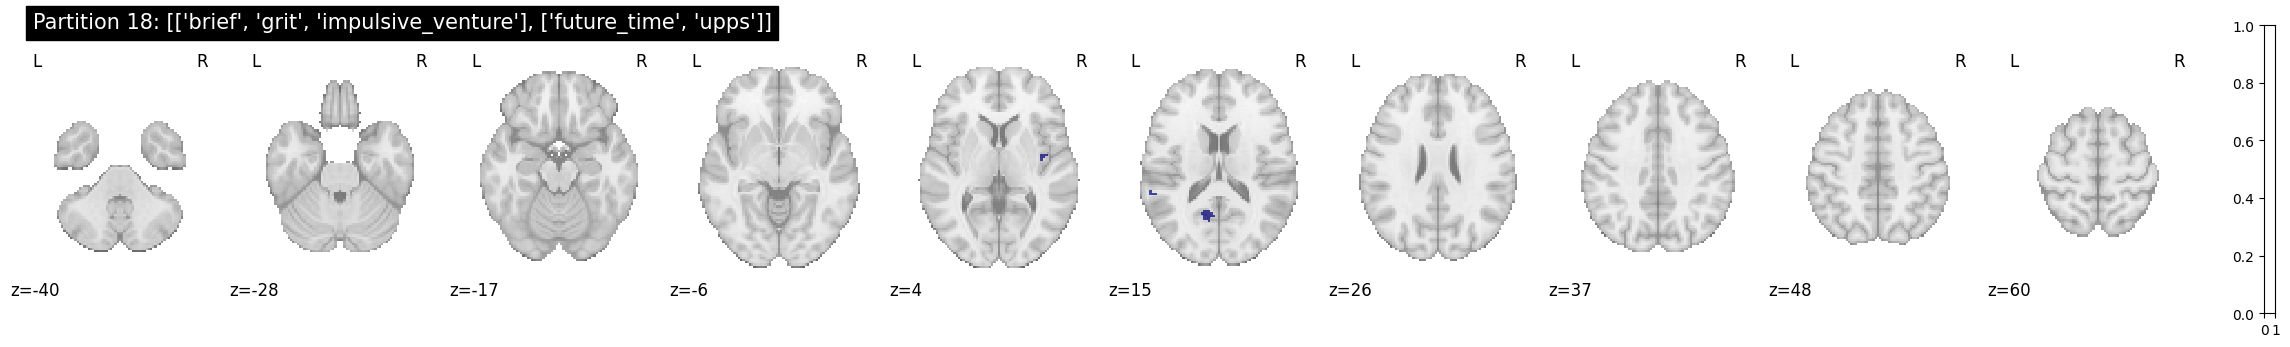

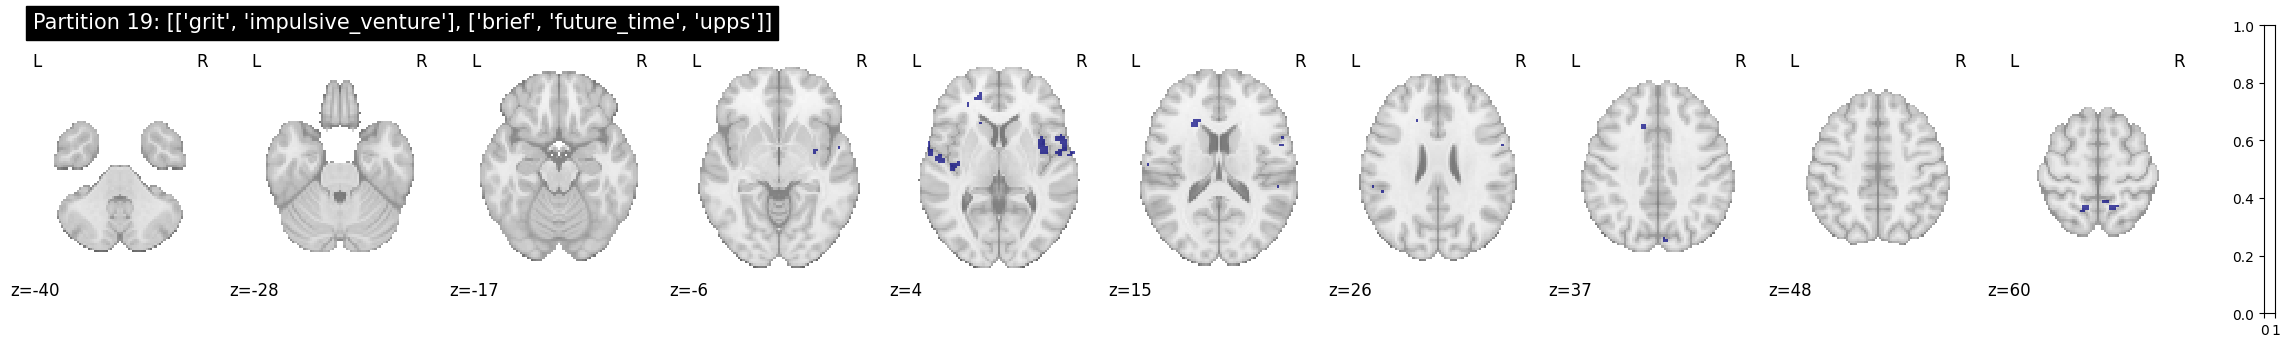

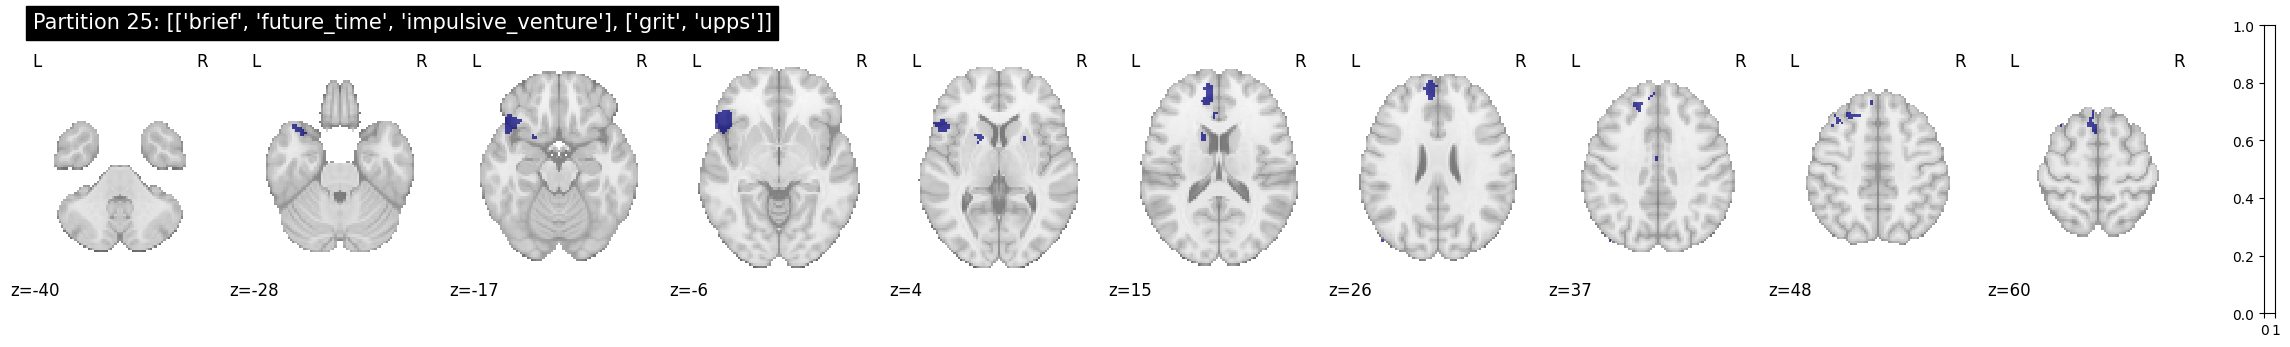

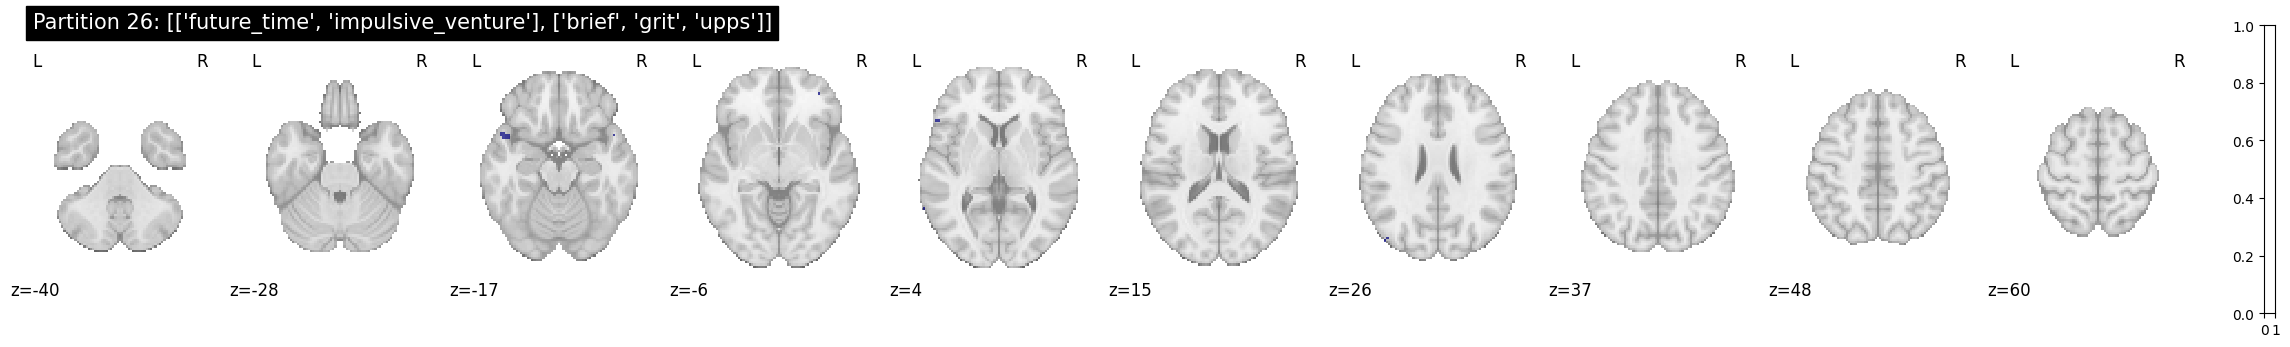

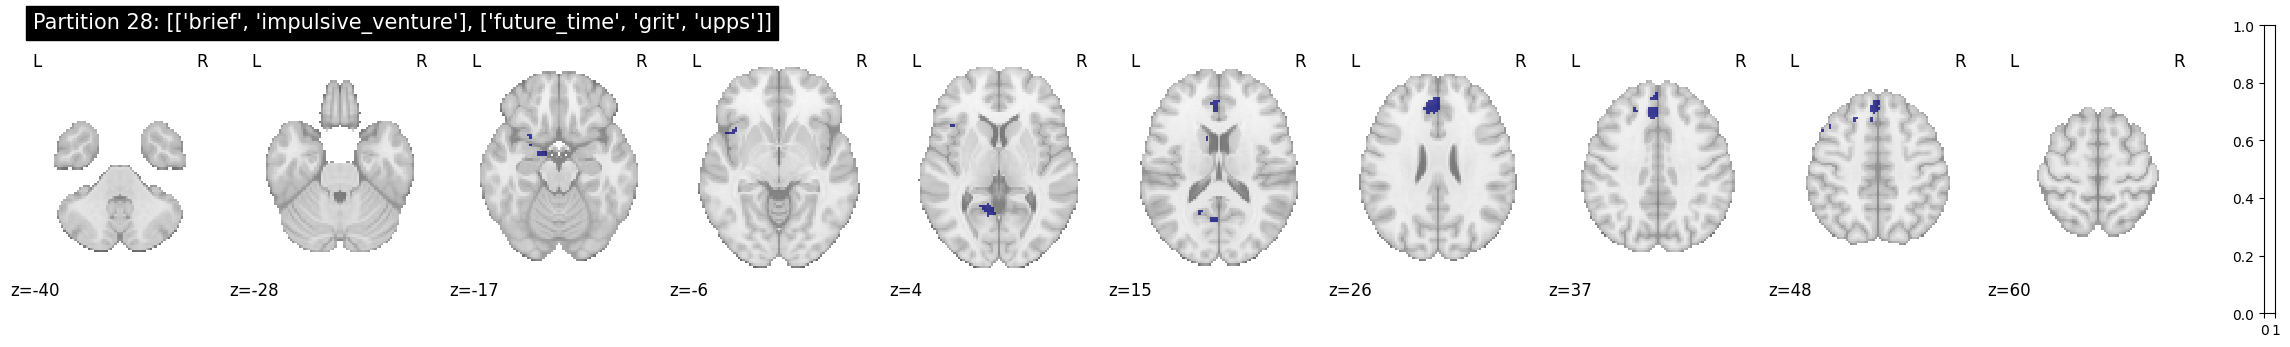

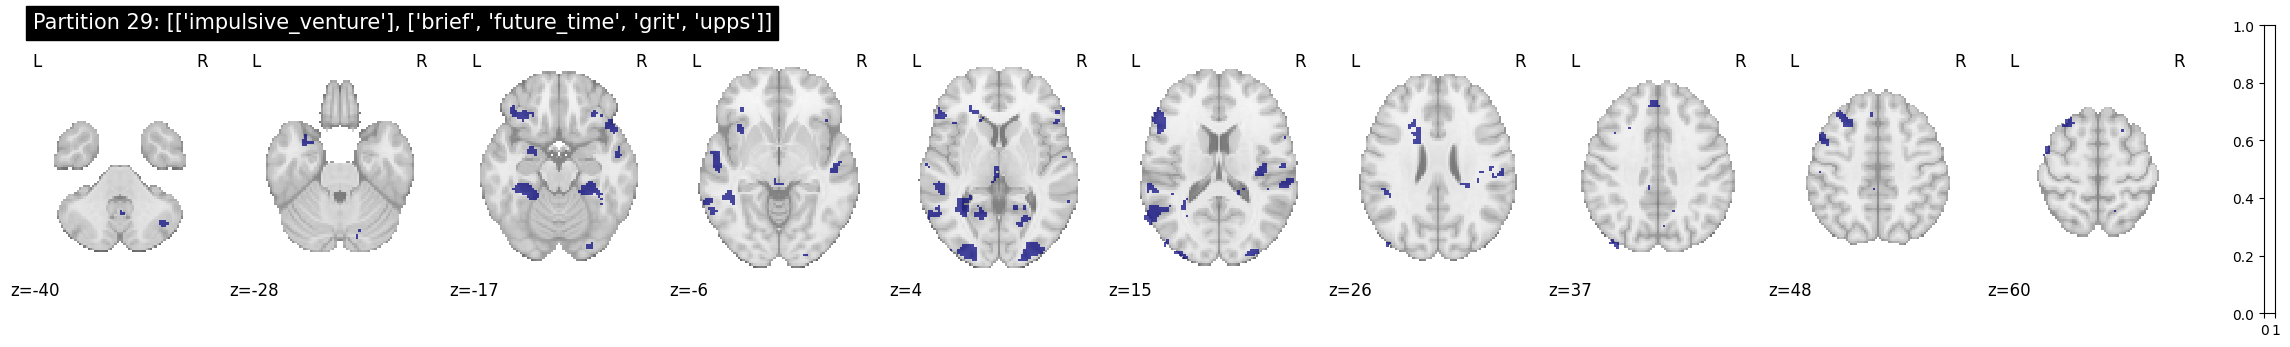

In [89]:
import numpy as np
from nilearn import image, plotting

# partition_sig_voxels_data is your Numpy array
unique_vals = np.unique(partition_sig_voxels_data)
unique_vals = unique_vals[unique_vals != 0]  # skip 0

# Define fixed z-slice coordinates (adjust these as needed for your data)
cut_coords = np.linspace(-40, 60, 10)  # example: 10 evenly spaced slices

for val in unique_vals:
    # Create a binary mask for the current partition
    mask_data = (partition_sig_voxels_data == val).astype(int)

    # Convert back to a NIfTI image (keep same affine/header as original)
    mask_img = image.new_img_like(partition_sig_voxels, mask_data)

    # Get the label string from your partition_key dictionary
    title = str(partition_key_names.get(int(val), 'Unknown'))

    # Plot using fixed slices
    plotting.plot_roi(
        mask_img,
        title=f'Partition {int(val)}: {title}',
        display_mode='z',
        cut_coords=cut_coords,
        draw_cross=False,
        colorbar=True,
    )

plotting.show()

/tmp/ipykernel_18344/136708795.py:20: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  mask_img = image.new_img_like(partition_sig_voxels, mask_data)
/home/users/jmumford/jaemon/.venv/lib/python3.9/site-packages/numpy/ma/core.py:2846: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


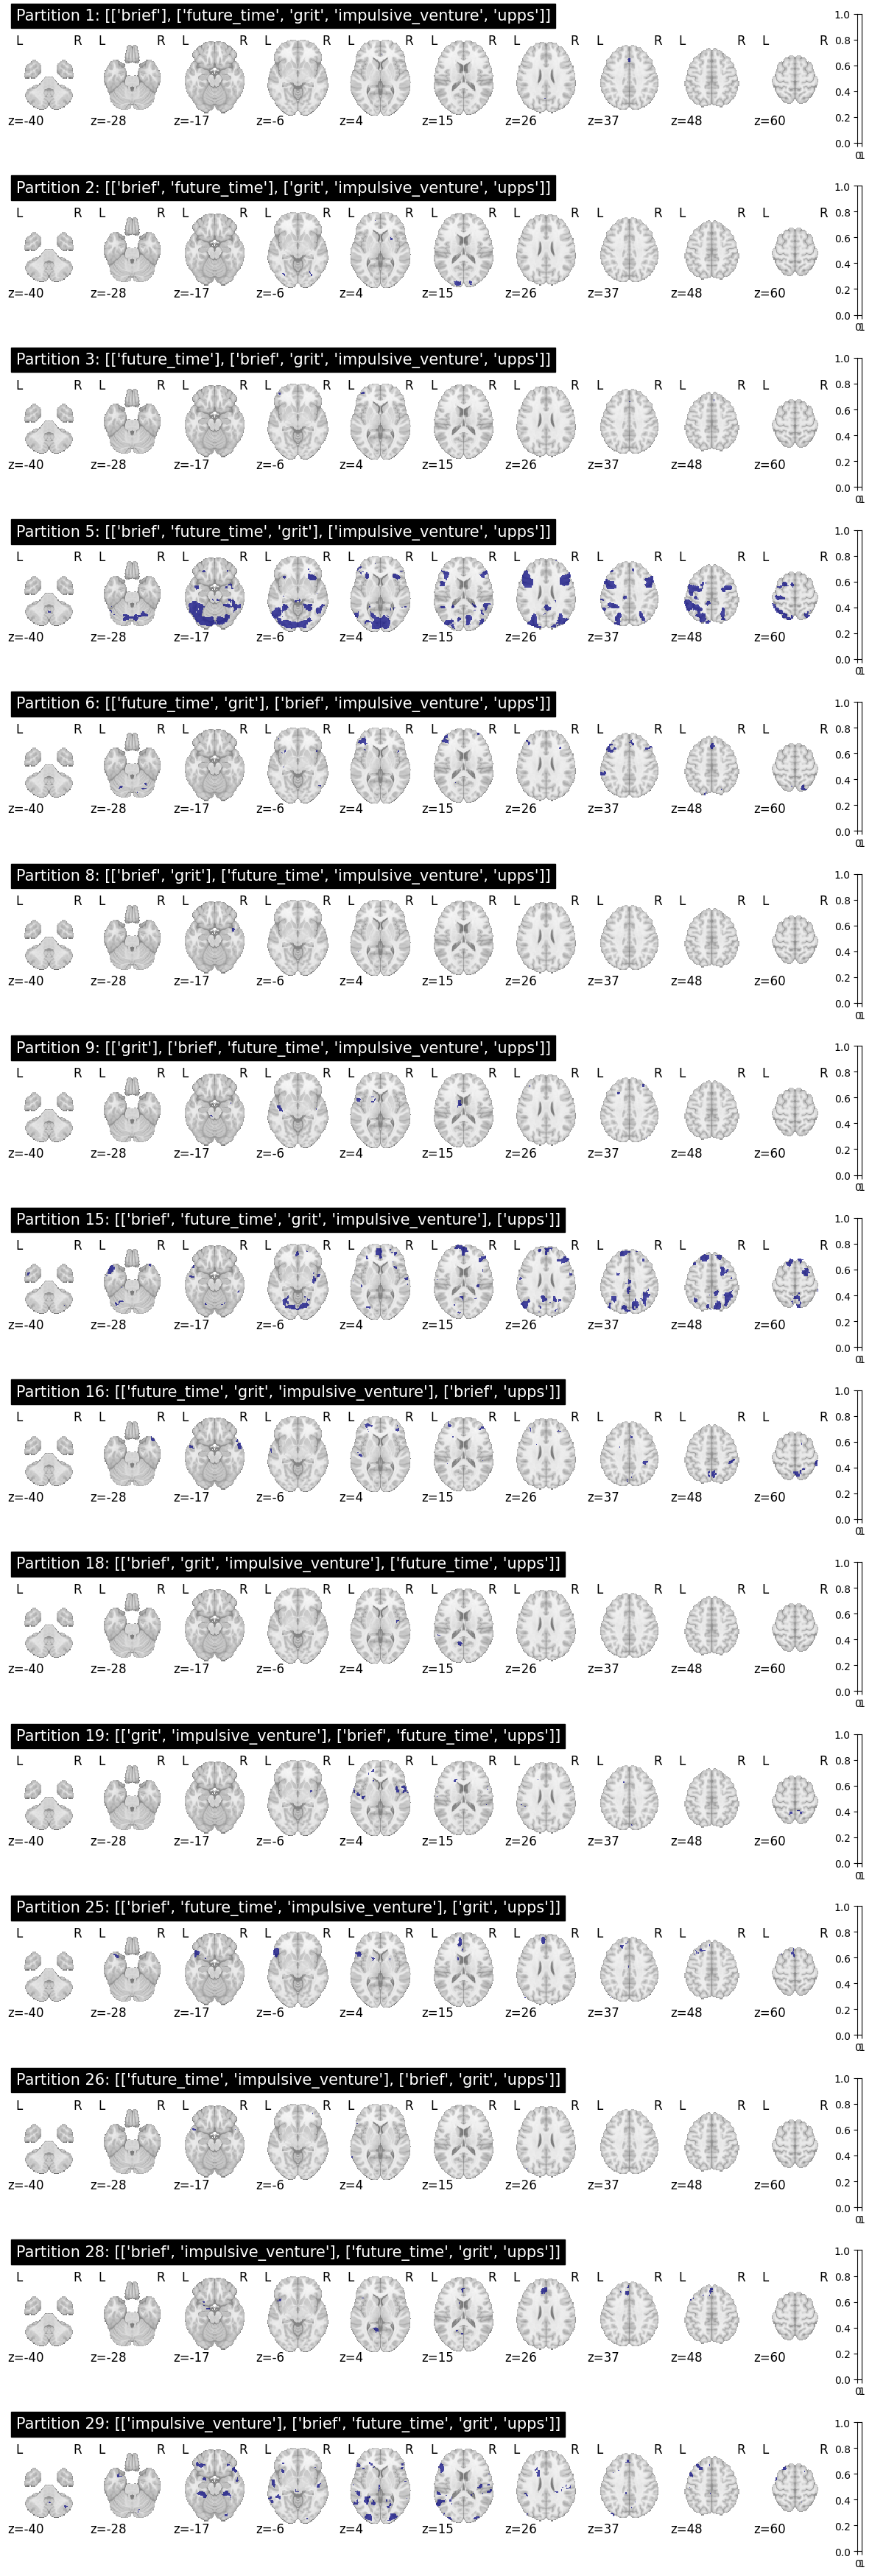

In [93]:
# Extract the unique partitions (skip background = 0)
unique_vals = np.unique(partition_sig_voxels_data)
unique_vals = unique_vals[unique_vals != 0]

# Define fixed z-slice coordinates
cut_coords = np.linspace(-40, 60, 10)  # 10 slices

# Create a matplotlib figure
fig, axes = plt.subplots(
    nrows=len(unique_vals), ncols=1, figsize=(15, 3 * len(unique_vals))
)

# Ensure axes is always iterable
if len(unique_vals) == 1:
    axes = [axes]

for ax, val in zip(axes, unique_vals):
    # Binary mask for this partition
    mask_data = (partition_sig_voxels_data == val).astype(int)
    mask_img = image.new_img_like(partition_sig_voxels, mask_data)

    # Label
    title = str(partition_key_names.get(int(val), 'Unknown'))

    # Use a Display object to embed into the matplotlib axes
    display = plotting.plot_roi(
        mask_img,
        display_mode='z',
        cut_coords=cut_coords,
        draw_cross=False,
        colorbar=True,
        axes=ax,
        figure=fig,
        title=f'Partition {int(val)}: {title}',
    )

plt.show()

In [94]:
gap_map = root / 'searchlight_q_means_score_gap.nii.gz'

In [90]:
partition_key_names

{1: [['brief'], ['future_time', 'grit', 'impulsive_venture', 'upps']],
 2: [['brief', 'future_time'], ['grit', 'impulsive_venture', 'upps']],
 3: [['future_time'], ['brief', 'grit', 'impulsive_venture', 'upps']],
 4: [['brief'], ['future_time'], ['grit', 'impulsive_venture', 'upps']],
 5: [['brief', 'future_time', 'grit'], ['impulsive_venture', 'upps']],
 6: [['future_time', 'grit'], ['brief', 'impulsive_venture', 'upps']],
 7: [['brief'], ['future_time', 'grit'], ['impulsive_venture', 'upps']],
 8: [['brief', 'grit'], ['future_time', 'impulsive_venture', 'upps']],
 9: [['grit'], ['brief', 'future_time', 'impulsive_venture', 'upps']],
 10: [['brief'], ['grit'], ['future_time', 'impulsive_venture', 'upps']],
 11: [['brief', 'future_time'], ['grit'], ['impulsive_venture', 'upps']],
 12: [['future_time'], ['brief', 'grit'], ['impulsive_venture', 'upps']],
 13: [['future_time'], ['grit'], ['brief', 'impulsive_venture', 'upps']],
 14: [['brief'], ['future_time'], ['grit'], ['impulsive_ventu

In [91]:
import numpy as np
import pandas as pd

# Load data arrays
cluster_data = cluster_map.get_fdata().astype(int)
partition_data = partition_img.get_fdata().astype(int)

# Flatten arrays for voxelwise pairing
cluster_flat = cluster_data.flatten()
partition_flat = partition_data.flatten()

# Only keep voxels where both cluster and partition are nonzero
mask = (cluster_flat > 0) & (partition_flat > 0)
cluster_flat = cluster_flat[mask]
partition_flat = partition_flat[mask]

# Build a DataFrame for crosstab
df = pd.DataFrame({'Cluster': cluster_flat, 'Partition': partition_flat})

# Crosstab of counts
counts = pd.crosstab(df['Partition'], df['Cluster'])


# Replace partition integers with names from partition_key_names
def format_partition(pnum):
    if pnum in partition_key_names:
        return str(partition_key_names[pnum])
    return f'Unknown-{pnum}'


counts.index = [format_partition(p) for p in counts.index]

print(counts)

Cluster                                                1     2     3    4   \
[['brief'], ['future_time', 'grit', 'impulsive_...     18    68     0    0   
[['brief', 'future_time'], ['grit', 'impulsive_...    232    46    18    0   
[['future_time'], ['brief', 'grit', 'impulsive_...      7    89     0    0   
[['brief', 'future_time', 'grit'], ['impulsive_...  13295  3022  2052  130   
[['future_time', 'grit'], ['brief', 'impulsive_...    465   944   157    1   
[['brief', 'grit'], ['future_time', 'impulsive_...     15     9    31    0   
[['grit'], ['brief', 'future_time', 'impulsive_...     27   156    30   17   
[['brief', 'future_time', 'grit', 'impulsive_ve...   4522  2627  1587    0   
[['future_time', 'grit', 'impulsive_venture'], ...    586   292   447    0   
[['brief', 'grit', 'impulsive_venture'], ['futu...     37     2    21    0   
[['grit', 'impulsive_venture'], ['brief', 'futu...    143   154   350    0   
[['brief', 'future_time', 'impulsive_venture'],...     69  1310 

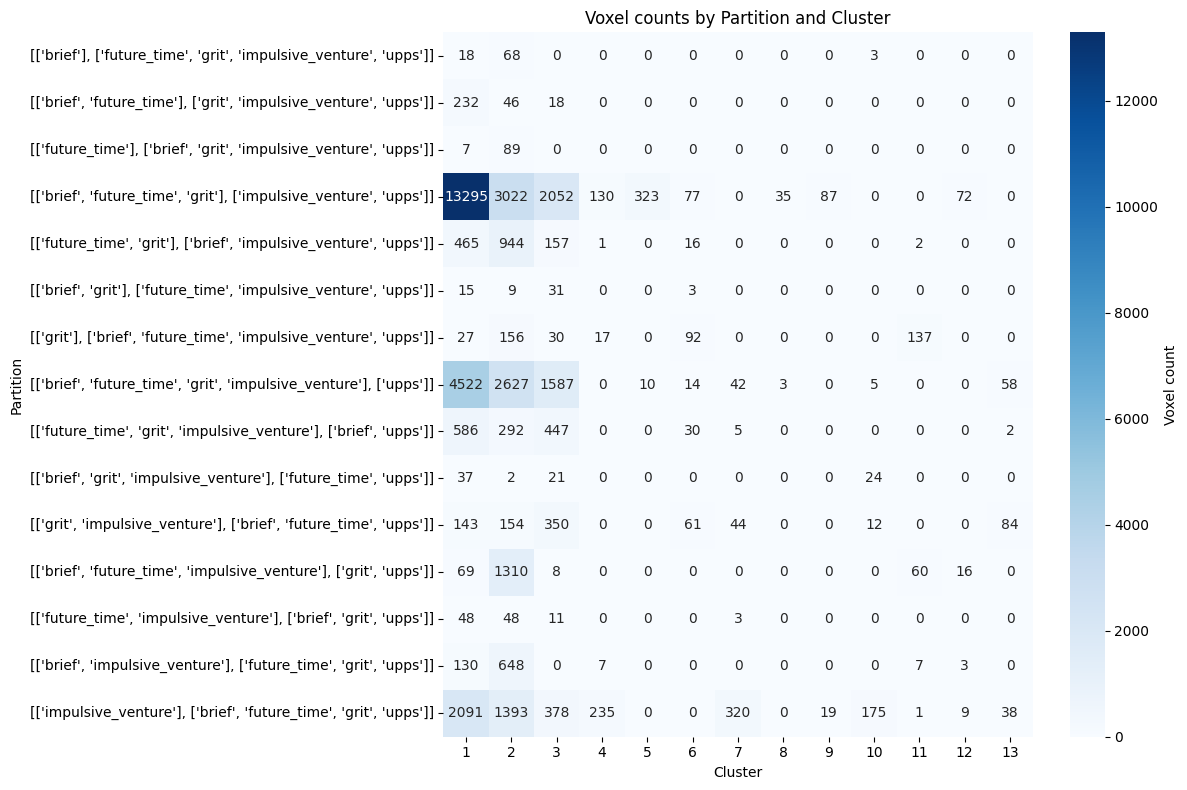

In [92]:
# Make the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    counts,
    annot=True,  # show counts inside the boxes
    fmt='d',  # integer format
    cmap='Blues',  # color scheme, e.g. "viridis", "magma", etc.
    cbar_kws={'label': 'Voxel count'},
)

plt.title('Voxel counts by Partition and Cluster')
plt.ylabel('Partition')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

# workign toward getting the averages...

In [96]:
from nilearn.maskers import NiftiMasker

from partition_search_analysis_functions import (
    center_within_subject,
    create_group_mask,
)

data_dir = Path(
    '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/output_surveyMedley_noderivs_rerun/questionnaire_averages'
)

fmri_prep_dir = '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep'


# Get all .nii.gz files in the directory
all_files = list(data_dir.glob('*_questionnaire_avg_sub_*.nii.gz'))

# Group files by subject
subject_files = defaultdict(list)
for file in all_files:
    subject = file.name.split('sub_')[-1].split('.')[0]
    questionnaire = file.name.split('_questionnaire_')[0]
    subject_files[subject].append((questionnaire, file))

# Keep only subjects with all 5 questionnaires
complete_subjects = {
    subject: files for subject, files in subject_files.items() if len(files) == 5
}

# Create a list of cleaned file paths
cleaned_files = [file for files in complete_subjects.values() for _, file in files]

questionnaires = sorted(
    set(q for files in complete_subjects.values() for q, _ in files)
)
questionnaire_dict = {name: i + 1 for i, name in enumerate(questionnaires)}


# Create sub_id and item_id vectors
sub_ids = []
item_ids = []
data_files = []

for subject, files in complete_subjects.items():
    for questionnaire, file in sorted(files):  # Sort to ensure consistent order
        sub_ids.append(int(subject))
        item_ids.append(questionnaire_dict[questionnaire])
        data_files.append(file)

# make the mask
group_mask = create_group_mask(sub_ids, fmri_prep_dir)


masker = NiftiMasker(
    mask_img=group_mask,
    standardize=False,
    smoothing_fwhm=None,
    memory='nilearn_cache',
    memory_level=1,
)
masker.fit()

fmri_data = masker.transform(data_files)
brain_data = fmri_data
brain_data_centered = center_within_subject(brain_data, sub_ids)

In [102]:
questionnaire_dict

{'brief': 1, 'future_time': 2, 'grit': 3, 'impulsive_venture': 4, 'upps': 5}

In [101]:
brain_data_centered.shape


(330, 153964)

In [107]:
def compute_partition_maps(partition, brain_data_centered, item_ids, masker):
    """
    Compute voxelwise mean maps for each segment of a partition and their difference.

    Parameters
    ----------
    partition : list of lists of int
        Partition definition, e.g. [[1, 2], [3, 4, 5]]
        where numbers refer to item_ids.
    brain_data_centered : np.ndarray
        2D array of shape (n_rows, n_voxels).
    item_ids : list[int]
        Vector giving the questionnaire item ID for each row of brain_data_centered.
    masker : NiftiMasker
        Fitted masker used to inverse_transform arrays back into NIfTI space.

    Returns
    -------
    maps : dict
        Dictionary with keys:
        - 'segment1': NIfTI image (mean of first segment)
        - 'segment2': NIfTI image (mean of second segment)
        - 'diff': NIfTI image (segment1 - segment2)
    """
    item_ids = np.array(item_ids)

    # First and second segments
    seg1_items, seg2_items = partition

    seg1_mask = np.isin(item_ids, seg1_items)
    seg2_mask = np.isin(item_ids, seg2_items)

    seg1_data = brain_data_centered[seg1_mask]
    seg2_data = brain_data_centered[seg2_mask]

    seg1_mean = seg1_data.mean(axis=0)
    seg2_mean = seg2_data.mean(axis=0)
    diff_data = seg1_mean - seg2_mean

    # Back to NIfTI
    seg1_img = masker.inverse_transform(seg1_mean)
    seg2_img = masker.inverse_transform(seg2_mean)
    diff_img = masker.inverse_transform(diff_data)

    return {'segment1': seg1_img, 'segment2': seg2_img, 'seg1_minus_seg2': diff_img}


In [104]:
partition = [[1, 2], [3, 4, 5]]
output = compute_partition_maps(partition, brain_data_centered, item_ids, masker)

In [105]:
output

{'segment1': <nibabel.nifti1.Nifti1Image at 0x7fb8dd4ef910>,
 'segment2': <nibabel.nifti1.Nifti1Image at 0x7fb8df5d8070>,
 'diff': <nibabel.nifti1.Nifti1Image at 0x7fb8de55eb80>}

In [109]:
val = 2
partition_integer_form = partition_key.get(int(val), 'Unknown')
print(partition_integer_form)

[[1, 2], [3, 4, 5]]


/tmp/ipykernel_18344/1027311102.py:20: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  mask_img = image.new_img_like(partition_sig_voxels, mask_data)


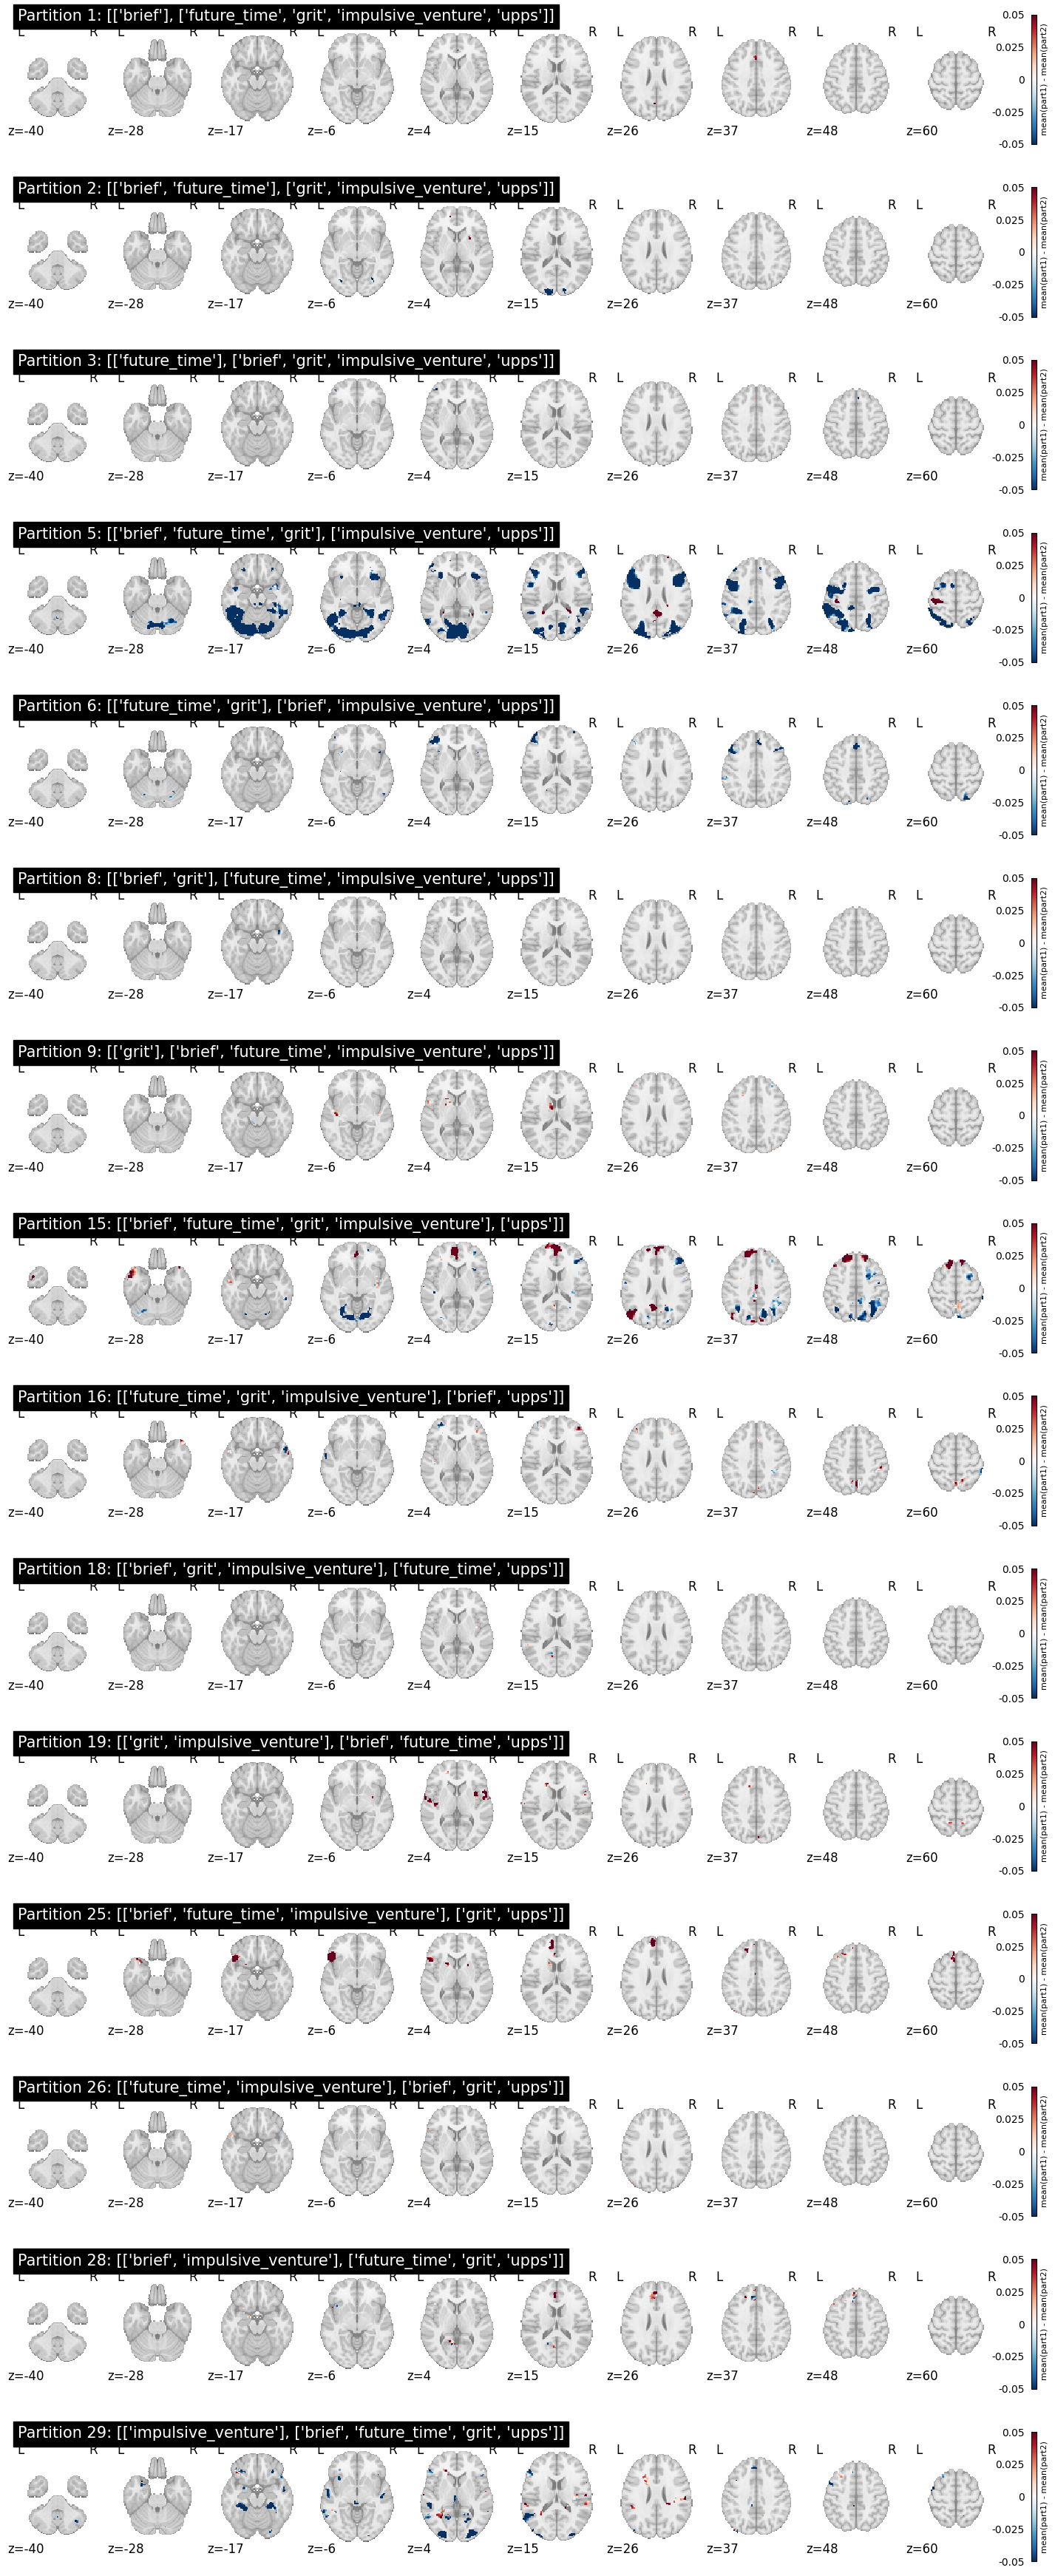

In [115]:
# Extract the unique partitions (skip background = 0)
unique_vals = np.unique(partition_sig_voxels_data)
unique_vals = unique_vals[unique_vals != 0]

# Define fixed z-slice coordinates
cut_coords = np.linspace(-40, 60, 10)  # 10 slices

# Create a matplotlib figure
fig, axes = plt.subplots(
    nrows=len(unique_vals), ncols=1, figsize=(18, 3 * len(unique_vals))
)

# Ensure axes is always iterable
if len(unique_vals) == 1:
    axes = [axes]

for ax, val in zip(axes, unique_vals):
    # Binary mask for this partition
    mask_data = (partition_sig_voxels_data == val).astype(int)
    mask_img = image.new_img_like(partition_sig_voxels, mask_data)
    partition_integer_form = partition_key.get(int(val), 'Unknown')
    partition_averages = compute_partition_maps(
        partition, brain_data_centered, item_ids, masker
    )
    # Label
    title = str(partition_key_names.get(int(val), 'Unknown'))
    partition_avg_diff = image.math_img(
        'img1 * img2', img1=mask_img, img2=partition_averages['seg1_minus_seg2']
    )  # Use a Display object to embed into the matplotlib axes
    display = plotting.plot_stat_map(
        partition_avg_diff,
        display_mode='z',
        cut_coords=cut_coords,
        draw_cross=False,
        colorbar=True,
        axes=ax,
        figure=fig,
        title=f'Partition {int(val)}: {title}',
        vmax=0.05,
    )
    plt.gcf().axes[-1].set_ylabel('mean(part1) - mean(part2)', fontsize=8)


plt.show()